In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import re

In [88]:
df=pd.read_csv("interest_rate_history.csv")

In [89]:
df.head()

,Date Year,Date Day Month,Deposit Facility,Fixed Rate Tenders,Variable Rate Tenders,Marginal Lending Facility
0,2024.0,12 Jun.,3.75,4.25,-,4.50
1,2023.0,20 Sep.,4.00,4.50,-,4.75
2,2023.0,2 Aug.,3.75,4.25,-,4.50
3,2023.0,21 Jun.,3.50,4.00,-,4.25
4,2023.0,10 May,3.25,3.75,-,4.00


In [90]:
#first lets deal with the Date year column by filling the years missing 
#with the previous year
df['Date Year'].isnull( ).sum( )



32

In [91]:
df['Date Year'] = df['Date Year'].ffill().astype(int)

In [92]:
df['Date Day Month']=df['Date Day Month'].str.split('.', expand=True)[0]

In [93]:
# Split 'Date' column into 'Day' and 'Month' columns
df['Day']= df['Date Day Month'].str.split(' ', expand=True)[0]
df['Month'] = df['Date Day Month'].str.split(' ', expand=True)[1]

In [94]:
# Combine 'Day', 'Month', and 'Year' into a new 'Date' column
df['Date'] = df['Day'] + '-' + df['Month'] + '-' + df['Date Year'].astype(str)

In [95]:
df['Date'] = pd.to_datetime(df['Date'])

In [124]:
df.head(2)

,Date Year,Date Day Month,Deposit Facility,Fixed Rate Tenders,Variable Rate Tenders,Marginal Lending Facility,Day,Month,Date
0,2024,12 Jun,3.75,4.25,-,4.50,12,Jun,2024-06-12
1,2023,20 Sep,4.00,4.50,-,4.75,20,Sep,2023-09-20


In [125]:
df_new = df.drop(['Date Day Month', 'Day', 'Month', 'Date Year'], axis=1)

In [126]:
df_new.head()

,Deposit Facility,Fixed Rate Tenders,Variable Rate Tenders,Marginal Lending Facility,Date
0,3.75,4.25,-,4.50,2024-06-12
1,4.00,4.50,-,4.75,2023-09-20
2,3.75,4.25,-,4.50,2023-08-02
3,3.50,4.00,-,4.25,2023-06-21
4,3.25,3.75,-,4.00,2023-05-10


In [127]:
df_new.set_index('Date', inplace=True)

In [128]:
df_new.head()

,Deposit Facility,Fixed Rate Tenders,Variable Rate Tenders,Marginal Lending Facility
Date,,,,
2024-06-12,3.75,4.25,-,4.50
2023-09-20,4.00,4.50,-,4.75
2023-08-02,3.75,4.25,-,4.50
2023-06-21,3.50,4.00,-,4.25
2023-05-10,3.25,3.75,-,4.00


In [129]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2024-06-12 to 1999-01-01
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Deposit Facility           60 non-null     object 
 1   Fixed Rate Tenders         60 non-null     object 
 2   Variable Rate Tenders      60 non-null     object 
 3   Marginal Lending Facility  60 non-null     float64
dtypes: float64(1), object(3)
memory usage: 2.3+ KB


In [135]:

# Function to convert strings with non-standard minus signs to proper floats and handle missing values
def convert_to_negative_float(value):
    if isinstance(value, str):
        # Replace non-standard minus sign '−' with standard hyphen '-'
        value = value.replace('−', '-')
        # Check if the value is a valid negative number
        if value.startswith('-'):
            try:
                return float(value)
            except ValueError:
                return np.nan  # Return NaN if conversion fails
        # Check if the value is a hyphen representing missing value
        elif value == '-':
            return np.nan
        else:
            try:
                return float(value)  # Convert other numeric strings to float
            except ValueError:
                return value  # Return the original value if conversion fails
    return value  # Return the original value if it's not a string

# Apply the function to numeric columns
numeric_columns = ['Deposit Facility', 'Fixed Rate Tenders', 'Variable Rate Tenders', 'Marginal Lending Facility']
for col in numeric_columns:
    df_new[col] = df_new[col].apply(convert_to_negative_float)

# Display the DataFrame
df_new

,Deposit Facility,Fixed Rate Tenders,Variable Rate Tenders,Marginal Lending Facility
Date,,,,
2024-06-12,3.75,4.25,NaN,4.50
2023-09-20,4.00,4.50,NaN,4.75
2023-08-02,3.75,4.25,NaN,4.50
2023-06-21,3.50,4.00,NaN,4.25
2023-05-10,3.25,3.75,NaN,4.00
2023-03-22,3.00,3.50,NaN,3.75
2023-02-08,2.50,3.00,NaN,3.25
2022-12-21,2.00,2.50,NaN,2.75
2022-11-02,1.50,2.00,NaN,2.25


In [136]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2024-06-12 to 1999-01-01
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Deposit Facility           60 non-null     float64
 1   Fixed Rate Tenders         39 non-null     float64
 2   Variable Rate Tenders      19 non-null     float64
 3   Marginal Lending Facility  60 non-null     float64
dtypes: float64(4)
memory usage: 2.3 KB


In [142]:
df_new.fillna(0, inplace=True)

In [143]:
df_new['Main_Refinancing']=df_new['Fixed Rate Tenders']+df_new['Variable Rate Tenders']

In [213]:
df_new.head()

,Deposit Facility,Fixed Rate Tenders,Variable Rate Tenders,Marginal Lending Facility,Main_Refinancing
Date,,,,,
2024-06-12,3.75,4.25,0.0,4.50,4.25
2023-09-20,4.00,4.50,0.0,4.75,4.50
2023-08-02,3.75,4.25,0.0,4.50,4.25
2023-06-21,3.50,4.00,0.0,4.25,4.00
2023-05-10,3.25,3.75,0.0,4.00,3.75


<Axes: xlabel='Date'>

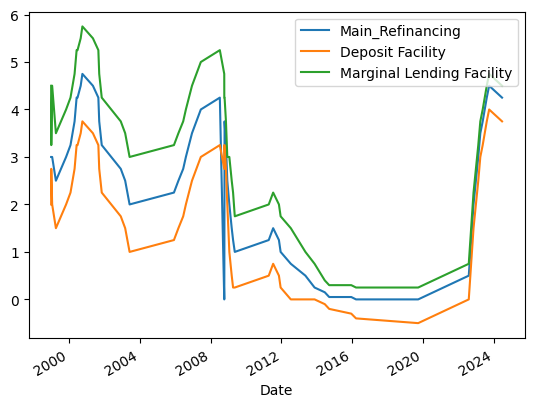

In [153]:
df_new.plot(y=['Main_Refinancing','Deposit Facility','Marginal Lending Facility'])

In [171]:
df_new2 = df_new.reset_index()

In [173]:
df_new2.head()

,Date,Deposit Facility,Fixed Rate Tenders,Variable Rate Tenders,Marginal Lending Facility,Main_Refinancing
0,2024-06-12,3.75,4.25,0.0,4.50,4.25
1,2023-09-20,4.00,4.50,0.0,4.75,4.50
2,2023-08-02,3.75,4.25,0.0,4.50,4.25
3,2023-06-21,3.50,4.00,0.0,4.25,4.00
4,2023-05-10,3.25,3.75,0.0,4.00,3.75


In [176]:
df_sorted = df_new2.sort_values(by='Date')


In [177]:
df_sorted.head()

,Date,Deposit Facility,Fixed Rate Tenders,Variable Rate Tenders,Marginal Lending Facility,Main_Refinancing
59,1999-01-01,2.00,3.0,0.0,4.50,3.0
58,1999-01-04,2.75,3.0,0.0,3.25,3.0
57,1999-01-22,2.00,3.0,0.0,4.50,3.0
56,1999-04-09,1.50,2.5,0.0,3.50,2.5
55,1999-11-05,2.00,3.0,0.0,4.00,3.0


In [179]:
df_sorted.reset_index(drop=True, inplace=True)

In [180]:
df_sorted.head()

,Date,Deposit Facility,Fixed Rate Tenders,Variable Rate Tenders,Marginal Lending Facility,Main_Refinancing
0,1999-01-01,2.00,3.0,0.0,4.50,3.0
1,1999-01-04,2.75,3.0,0.0,3.25,3.0
2,1999-01-22,2.00,3.0,0.0,4.50,3.0
3,1999-04-09,1.50,2.5,0.0,3.50,2.5
4,1999-11-05,2.00,3.0,0.0,4.00,3.0


In [165]:
euro_df=pd.read_csv('EURUSD_historical_data.csv')

In [188]:
euro_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3659 entries, 0 to 3658
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         3659 non-null   object 
 1   open         3659 non-null   float64
 2   high         3659 non-null   float64
 3   low          3659 non-null   float64
 4   close        3659 non-null   float64
 5   tick_volume  3659 non-null   int64  
 6   spread       3659 non-null   int64  
 7   real_volume  3659 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 228.8+ KB


In [167]:
euro_df.rename(columns={'time': 'Date'}, inplace=True)


In [189]:
euro_df['Date'] = pd.to_datetime(euro_df['Date'],format= '%Y-%m-%d')

In [190]:
euro_df.head()

,Date,open,high,low,close,tick_volume,spread,real_volume
0,2011-07-11,1.42020,1.42266,1.39858,1.40376,91689,7,0
1,2011-07-12,1.40377,1.40528,1.38371,1.39692,108574,7,0
2,2011-07-13,1.39692,1.42386,1.39621,1.42289,100600,7,0
3,2011-07-14,1.42289,1.42808,1.41156,1.41558,94223,7,0
4,2011-07-15,1.41555,1.41979,1.40919,1.41566,77058,7,0


In [193]:
combined_df=pd.merge(euro_df,df_sorted, on='Date', how='outer')

In [194]:
combined_df.head()

,Date,open,high,low,close,tick_volume,spread,real_volume,Deposit Facility,Fixed Rate Tenders,Variable Rate Tenders,Marginal Lending Facility,Main_Refinancing
0,1999-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,3.0,0.0,4.50,3.0
1,1999-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.75,3.0,0.0,3.25,3.0
2,1999-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,3.0,0.0,4.50,3.0
3,1999-04-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.50,2.5,0.0,3.50,2.5
4,1999-11-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,3.0,0.0,4.00,3.0


In [195]:
df_cleaned = combined_df.dropna(thresh=len(combined_df.columns) - 6)
df_cleaned.head()


,Date,open,high,low,close,tick_volume,spread,real_volume,Deposit Facility,Fixed Rate Tenders,Variable Rate Tenders,Marginal Lending Facility,Main_Refinancing
38,2011-07-11,1.42020,1.42266,1.39858,1.40376,91689.0,7.0,0.0,NaN,NaN,NaN,NaN,NaN
39,2011-07-12,1.40377,1.40528,1.38371,1.39692,108574.0,7.0,0.0,NaN,NaN,NaN,NaN,NaN
40,2011-07-13,1.39692,1.42386,1.39621,1.42289,100600.0,7.0,0.0,0.75,1.5,0.0,2.25,1.5
41,2011-07-14,1.42289,1.42808,1.41156,1.41558,94223.0,7.0,0.0,NaN,NaN,NaN,NaN,NaN
42,2011-07-15,1.41555,1.41979,1.40919,1.41566,77058.0,7.0,0.0,NaN,NaN,NaN,NaN,NaN


In [198]:
df_filled = df_cleaned.ffill()
df_filled = df_cleaned.bfill()

In [199]:
df_filled.head()

,Date,open,high,low,close,tick_volume,spread,real_volume,Deposit Facility,Fixed Rate Tenders,Variable Rate Tenders,Marginal Lending Facility,Main_Refinancing
38,2011-07-11,1.42020,1.42266,1.39858,1.40376,91689.0,7.0,0.0,0.75,1.50,0.0,2.25,1.50
39,2011-07-12,1.40377,1.40528,1.38371,1.39692,108574.0,7.0,0.0,0.75,1.50,0.0,2.25,1.50
40,2011-07-13,1.39692,1.42386,1.39621,1.42289,100600.0,7.0,0.0,0.75,1.50,0.0,2.25,1.50
41,2011-07-14,1.42289,1.42808,1.41156,1.41558,94223.0,7.0,0.0,0.50,1.25,0.0,2.00,1.25
42,2011-07-15,1.41555,1.41979,1.40919,1.41566,77058.0,7.0,0.0,0.50,1.25,0.0,2.00,1.25


In [210]:
final_df= df_filled.reset_index(drop=True)


In [211]:
final_df.head()

,Date,open,high,low,close,tick_volume,spread,real_volume,Deposit Facility,Fixed Rate Tenders,Variable Rate Tenders,Marginal Lending Facility,Main_Refinancing
0,2011-07-11,1.42020,1.42266,1.39858,1.40376,91689.0,7.0,0.0,0.75,1.50,0.0,2.25,1.50
1,2011-07-12,1.40377,1.40528,1.38371,1.39692,108574.0,7.0,0.0,0.75,1.50,0.0,2.25,1.50
2,2011-07-13,1.39692,1.42386,1.39621,1.42289,100600.0,7.0,0.0,0.75,1.50,0.0,2.25,1.50
3,2011-07-14,1.42289,1.42808,1.41156,1.41558,94223.0,7.0,0.0,0.50,1.25,0.0,2.00,1.25
4,2011-07-15,1.41555,1.41979,1.40919,1.41566,77058.0,7.0,0.0,0.50,1.25,0.0,2.00,1.25


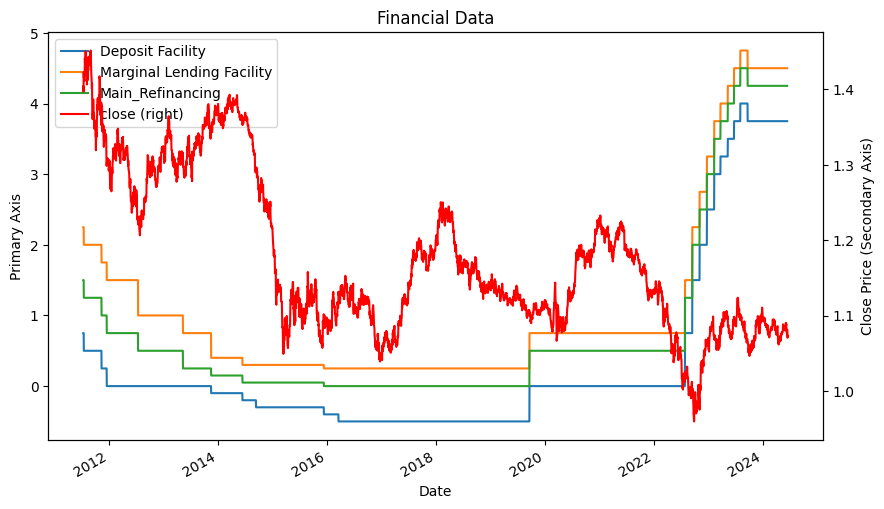

In [212]:
# Plot the DataFrame
ax = final_df.plot(x='Date', y=['Deposit Facility', 'Marginal Lending Facility', 'Main_Refinancing'], figsize=(10, 6))

# Plot 'close' on the secondary y-axis
final_df.plot(x='Date', y='close', secondary_y=True, ax=ax, color='red')

# Set the title and labels
ax.set_title('Financial Data')
ax.set_xlabel('Date')
ax.set_ylabel('Primary Axis')
ax.right_ax.set_ylabel('Close Price (Secondary Axis)')

plt.show()

<Axes: >

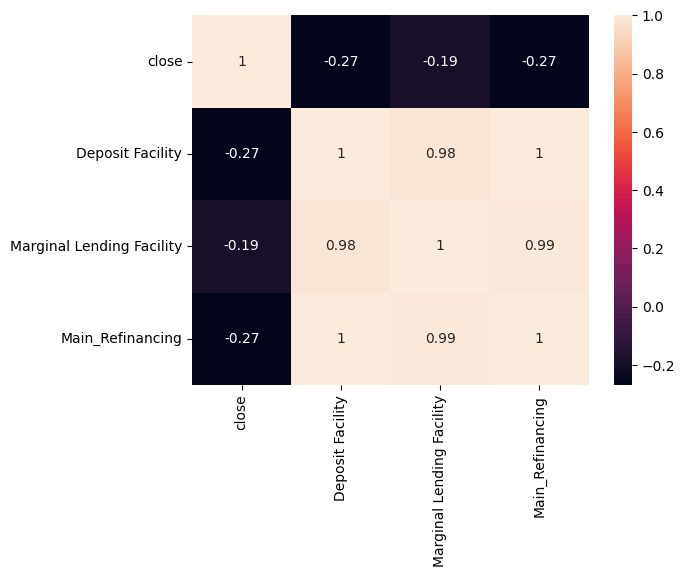

In [222]:
sns.heatmap(final_df[['close','Deposit Facility','Marginal Lending Facility','Main_Refinancing']].corr(), annot=True)